# 4. Functions


## Examples

### 4.1. Overview
One construct that’s extremely useful and provided by almost all programming languages is functions.

We have already met several functions, such as

- the sqrt() function from NumPy and

- the built-in print() function

In this lecture we’ll treat functions systematically and begin to learn just how useful and important they are.

One of the things we will learn to do is build our own user-defined functions

We will use the following imports.

```py
        %matplotlib inline
        import numpy as np
        import matplotlib.pyplot as plt
        plt.rcParams['figure.figsize'] = (10,6)
```

### Built-In Functions
Python has a number of built-in functions that are available without import.

In [3]:
print(max(19,20))
print('foobar')
print(str(22))
print(type(22))

# Two more useful built-in functions are any() and all()
bools = False,True,True
print(all(bools)) # True if all are True and False otherwise
print(any(bools)) # False if all are False and True otherwise


20
foobar
22
<class 'int'>
False
True


### Third Party Functions
If the built-in functions don’t cover what we need, we either need to import functions or create our own.


In [4]:
import calendar
calendar.isleap(2023)

False

### Defining Functions
In many instances, it is useful to be able to define our own functions.

This will become clearer as you see more examples.

Let’s start by discussing how it’s done.

#### Basic Syntax
Here’s a very simple Python function, that implements the mathematical function  $f(x) = 2x +1$
```py
    def f(x):
        return 2 * x + 1
```

Calling the function:
```py
    f(1)
```

In [5]:
def new_abs_function(x):
    if x < 0:
        abs_value = -x
    else:
        abs_value = x
    return abs_value

print(new_abs_function(3))
print(new_abs_function(-3))

3
3


### Keyword Arguments

Consider
```py
    plt.plot(x,'b-',label='white-noise')
```
In this call to Matplotlib’s plot function, notice that the last argument is passed in $name=argument$ syntax.

This is called a $keyword argument$, with $label$ being the keyword.

Non-keyword arguments are called positional arguments, since their meaning is determined by order

- $plot(x, 'b-', label="white noise")$ is different from $plot('b-', x, label="white noise")$

Keyword arguments are particularly useful when a function has a lot of arguments, in which case it’s hard to remember the right order.

You can adopt keyword arguments in user-defined functions with no difficulty.

The next example illustrates the syntax

In [7]:
def f(x, a=1, b=1):
    return a + b * x

print(f(2))
print(f(2,a=4,b=5))

3
14


### One-Line Functions: lambda
The lambda keyword is used to create simple functions on one line.

For example, the definitions


In [8]:
def f(x):
    return x**3


f = lambda x: x**3 

# Both the above are equivalent


To see why lambda is useful, suppose that we want to calculate $\int_0^2 x^3 dx$ (and have forgotten our high-school calculus).

The SciPy library has a function called quad that will do this calculation for us.

The syntax of the quad function is quad(f, a, b) where f is a function and a and b are numbers.

To create the function $f(x) = x^3$ we can use lambda as follows

In [10]:
from scipy.integrate import quad

quad(lambda x: x**3, 0, 2)

(4.0, 4.440892098500626e-14)

### Applications


#### Random Draws

Consider this code

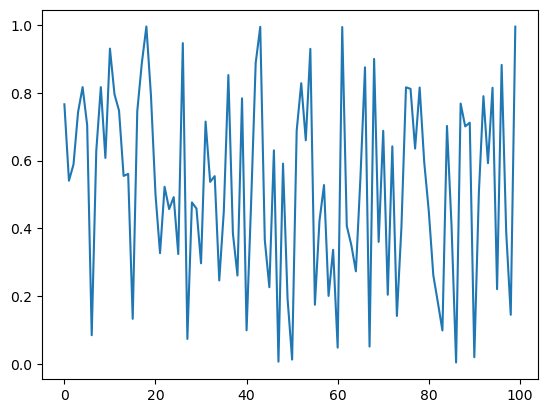

In [20]:
import numpy as np
import matplotlib.pyplot as plt
ts_length = 100
ε_values = [] # empty list
for i in range(ts_length):
    e = np.random.rand()
    ε_values.append(e)

plt.plot(ε_values)
plt.show()

We will break this program into two parts:

1. A user-defined function that generates a list of random variables.

2. The main part of the program that

    1. calls this function to get data

    2. plots the data

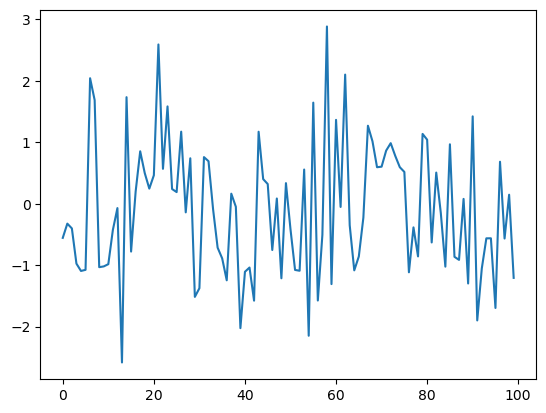

In [23]:
def generate_data(n):
    ε_values = []
    for i in range(n):
        e = np.random.randn()
        ε_values.append(e)
    return ε_values

data = generate_data(100)
plt.plot(data)
plt.show()

##### Adding condtions
Let’s make it slightly more useful by giving it the ability to return either standard normals or uniform random variables on $(0,1)$  as required.

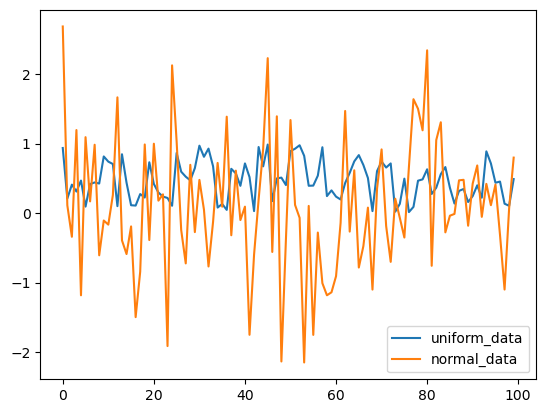

In [30]:
def generate_data(n,generator_type):
    ε_values = []
    for i in range(n):
        if generator_type == 'U':
            e = np.random.uniform(0,1)
        else:
            e = np.random.randn()
        ε_values.append(e)
    return ε_values

uniform_data = generate_data(100,'U')
normal_data = generate_data(100,'N')

plt.plot(uniform_data, label='uniform_data')
plt.plot(normal_data,label='normal_data')
plt.legend()
plt.show()

To simplify the above code, we can write it as:

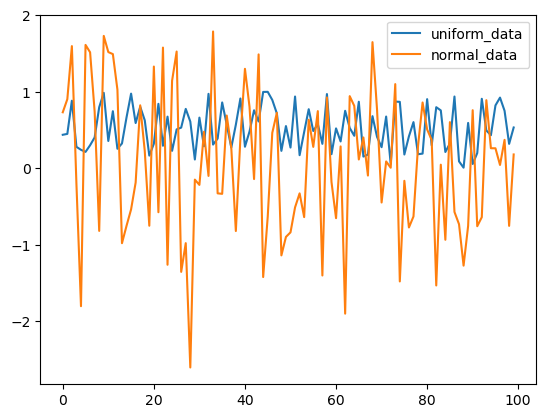

In [36]:
def generate_data(n,generator_type):    
    ε_values = []
    for i in range(n):
        e = generator_type() 
        ε_values.append(e)
    return ε_values

uniform_data = generate_data(100,np.random.uniform)
normal_data = generate_data(100,np.random.randn)

plt.plot(uniform_data, label='uniform_data')
plt.plot(normal_data,label='normal_data')
plt.legend()
plt.show()